## Time Series , Random Walk & White Noise

In [1]:
import statsmodels.tsa.stattools as sts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2

In [2]:
df = pd.read_csv(r"C:\Users\Sukanya\Desktop\DATA\Time_Series.csv")
df.head(3)

,date,spx,dax,ftse,nikkei
0,07-01-1994,469.90,2224.95,3445.98,18124.01
1,10-01-1994,475.27,2225.00,3440.58,18443.44
2,11-01-1994,474.13,2228.10,3413.77,18485.25


In [3]:
df.date = pd.to_datetime(df.date, dayfirst = True)
type(df.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
df.set_index('date', inplace = True)
df.head(3)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [5]:
df = df.asfreq('b')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


 Here 'a'= annual, 'm'= month, 'w'= week, 'd'= day, 'h'=hour, 'b' = business days,

# Handling Missing Values

In [6]:
df.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [7]:
df.spx = df.spx.fillna(method = 'ffill')
df.ftse = df.ftse.fillna(method = 'ffill')
df.dax = df.dax.fillna(method = 'ffill')
df.nikkei = df.nikkei.fillna(method = 'ffill')
df.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Methods to fill missing data 
- Front: filling assigning the null val entry prior to it.
- Back: filling assigning the null val entry exactly next to it. ( just use method = 'ffill) 
- Assigning the same value i.e all nulls are assigned same value say average. (df.dax = df.dax.fillna(value = df.dax.mean()) )

## Adding and deleting extra col

In [8]:
df['marketing_price'] = df.spx
df.describe()

,spx,dax,ftse,nikkei,marketing_price
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,1288.642547
std,487.868210,2755.563853,1145.616719,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4486.730000,10701.130000,992.715221
50%,1233.761241,5774.260000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7445.560000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [9]:
del df['marketing_price'] 
df.describe()

,spx,dax,ftse,nikkei
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753
std,487.868210,2755.563853,1145.616719,4043.795272
min,438.920000,1911.700000,2876.600000,7054.980000
25%,992.715221,4070.460000,4486.730000,10701.130000
50%,1233.761241,5774.260000,5663.300000,15030.510000
75%,1460.250000,7445.560000,6304.630175,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


## Splitting of Data

In [10]:
size = int(len(df)*0.8)
df_test = df.iloc[size:]
df_train = df.iloc[:size]
print(df_test.head(5))

                    spx      dax     ftse    nikkei
date                                               
2013-04-08  1563.071269  7662.64  6276.94  13192.59
2013-04-09  1568.607909  7637.51  6313.20  13192.35
2013-04-10  1587.731827  7810.63  6387.37  13288.13
2013-04-11  1593.369863  7871.63  6416.14  13549.16
2013-04-12  1588.854623  7744.77  6384.39  13485.14


In [11]:
print(df_train.tail(5))

                    spx      dax     ftse    nikkei
date                                               
2013-04-01  1562.173837  7795.31  6411.74  12135.02
2013-04-02  1570.252238  7943.87  6490.66  12003.43
2013-04-03  1553.686978  7874.75  6420.28  12362.20
2013-04-04  1559.979316  7817.39  6344.11  12634.54
2013-04-05  1553.278930  7658.75  6249.77  12833.64


No overlapping in our train and test sets

# White Noise

In [12]:
wn = np.random.normal(loc = df.spx.mean(), scale = df.spx.std(), size = len(df))

In [13]:
df['wn'] = wn

In [14]:
df.describe()

,spx,dax,ftse,nikkei,wn
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,1290.136477
std,487.868210,2755.563853,1145.616719,4043.795272,489.475794
min,438.920000,1911.700000,2876.600000,7054.980000,-336.019729
25%,992.715221,4070.460000,4486.730000,10701.130000,956.036473
50%,1233.761241,5774.260000,5663.300000,15030.510000,1287.909089
75%,1460.250000,7445.560000,6304.630175,17860.470000,1617.742191
max,2872.867839,13559.600000,7778.637689,24124.150000,3358.538769


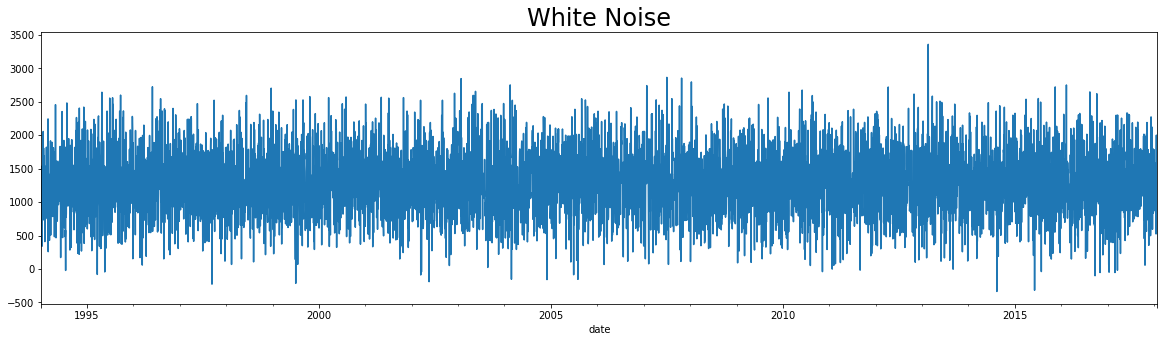

In [15]:
df.wn.plot(figsize = (20,5));
plt.title('White Noise', size = 24);

(0, 2300)

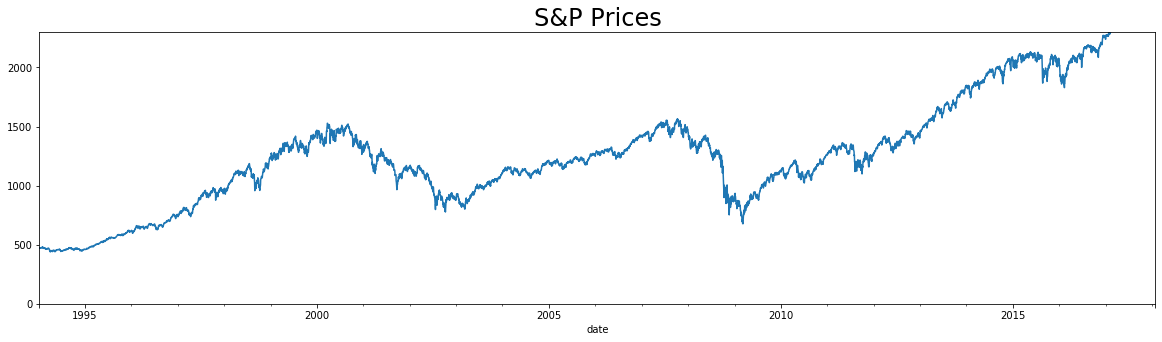

In [16]:
df.spx.plot(figsize = (20,5));
plt.title('S&P Prices', size = 24);
plt.ylim(0,2300)

(0, 2300)

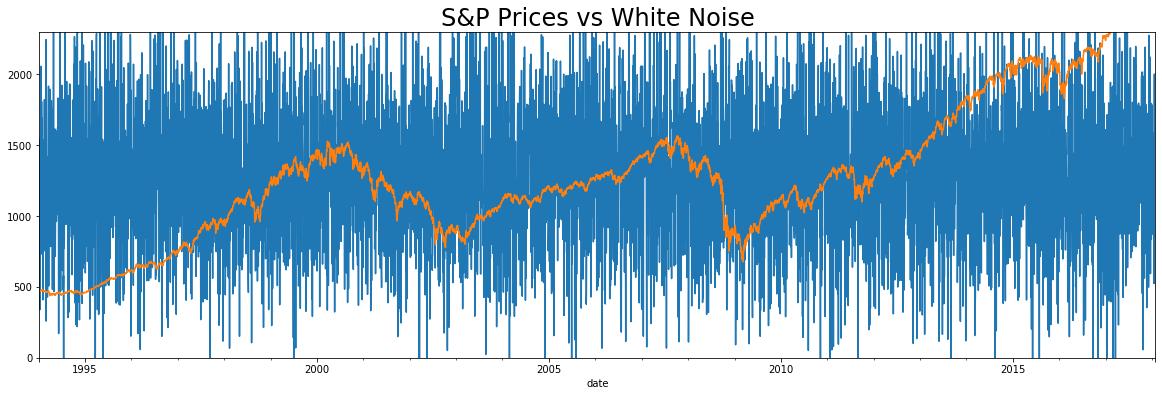

In [17]:
df.wn.plot(figsize = (20,6));
plt.title('White Noise', size = 24);
df.spx.plot(figsize = (20,6));
plt.title('S&P Prices vs White Noise', size = 24);
plt.ylim(0,2300)

# Random walk

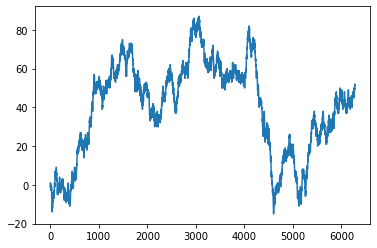

In [18]:
from random import seed
from random import random
from matplotlib import pyplot
seed(1)
rw = list()
rw.append(-1 if random() < 0.5 else 1)
for i in range(1, len(df)):
    movement = -1 if random() < 0.5 else 1
    value = rw[i-1] + movement
    rw.append(value)
pyplot.plot(rw)
pyplot.show()

In [19]:
df['rw'] = rw
df.head(3)

,spx,dax,ftse,nikkei,wn,rw
date,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,1097.327292,-1
1994-01-10,475.27,2225.00,3440.58,18443.44,1010.569799,0
1994-01-11,474.13,2228.10,3413.77,18485.25,1529.400336,1


## Dickey-Fuller test for stationarity

In [20]:
# Dickey-Fuller test to test stationarity of a model
# Ho: Model is non-stationary(phi<1)
#H1: Model is stationary(phi=1)

In [21]:
sts.adfuller(df.spx)

(1.1194986381728387,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.20986775002)

In [22]:
sts.adfuller(df.wn)

(-79.09173593109436,
 0.0,
 0,
 6276,
 {'1%': -3.4313923799633836,
  '5%': -2.862000639842268,
  '10%': -2.567015195598801},
 95046.7210653003)

In [23]:
sts.adfuller(df.rw)

(-2.0395750260620344,
 0.2694948076126773,
 0,
 6276,
 {'1%': -3.4313923799633836,
  '5%': -2.862000639842268,
  '10%': -2.567015195598801},
 17711.84039642805)

## Seasonality

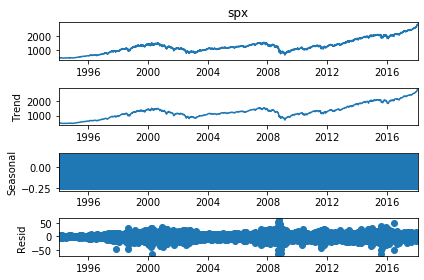

In [24]:
df_ses_dec = seasonal_decompose(df.spx, model = "additive")
df_ses_dec.plot()
plt.show()

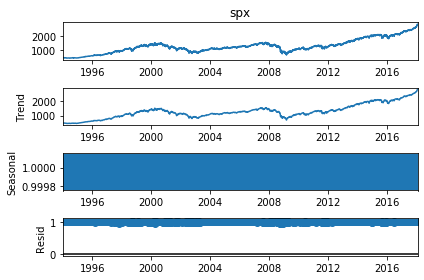

In [25]:
df_mul_dec = seasonal_decompose(df.spx, model = "multiplicative")
df_mul_dec.plot()
plt.show()

## ACF

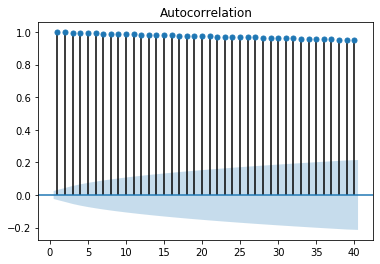

In [26]:
# For prices which are non-stationary
sgt.plot_acf(df.spx, lags = 40, zero = False)
plt.show()

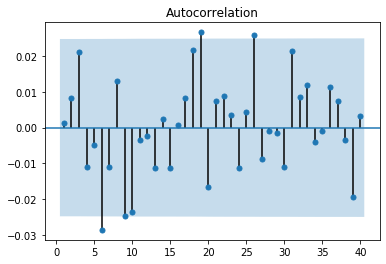

In [27]:
# For White Noise
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.show()

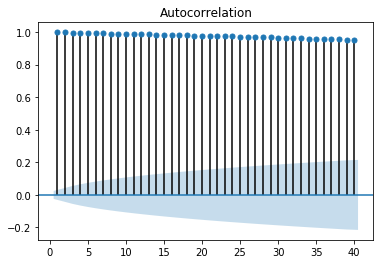

In [28]:
# For random-walk
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.show()

## PACF

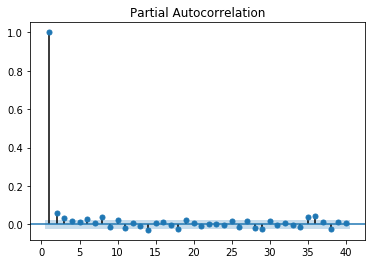

In [29]:
# For Prices
sgt.plot_pacf(df.spx, lags = 40, zero = False, method = ('ols'))
plt.show()

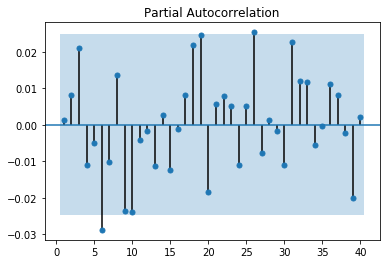

In [30]:
# For White Noise
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.show()

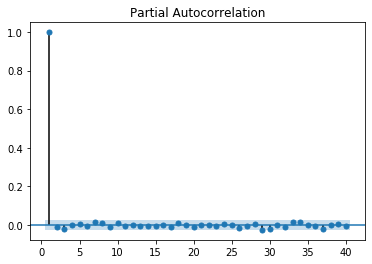

In [31]:
# For Random Walk
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.show()

## Auto-Regressive Model of order 1

In [32]:
model_AR = ARMA(df.ftse, order = (1,0))
results_ar = model_AR.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(1, 0)   Log Likelihood              -34438.109
Method:                       css-mle   S.D. of innovations             58.379
Date:                Mon, 19 Oct 2020   AIC                          68882.219
Time:                        10:58:53   BIC                          68902.453
Sample:                    01-07-1994   HQIC                         68889.229
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5819.5393    868.663      6.699      0.000    4116.990    7522.088
ar.L1.ftse     0.9991      0.001   1511.142      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

## Higher Order AR Models

In [33]:
model_AR2 = ARMA(df.ftse, order = (2,0))
results_ar2 = model_AR2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -34437.954
Method:                       css-mle   S.D. of innovations             58.377
Date:                Mon, 19 Oct 2020   AIC                          68883.908
Time:                        10:58:53   BIC                          68910.887
Sample:                    01-07-1994   HQIC                         68893.256
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5926.2723   1059.369      5.594      0.000    3849.947    8002.597
ar.L1.ftse     0.9905      0.013     78.970      0.000       0.966       1.015
ar.L2.ftse     0.0087      0.013      0.692      0.489      -0.016       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           +0.0000j            1.0008            0.0000
AR.2         -115.0823           +0.0000j          115.0823            0.5000
-----------------------------------------------------------------------------
"""

In [34]:
model_AR3 = ARMA(df.ftse, order = (3,0))
results_ar3 = model_AR3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(3, 0)   Log Likelihood              -34430.900
Method:                       css-mle   S.D. of innovations             58.312
Date:                Mon, 19 Oct 2020   AIC                          68871.801
Time:                        10:58:54   BIC                          68905.524
Sample:                    01-07-1994   HQIC                         68883.485
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5838.3619    945.636      6.174      0.000    3984.950    7691.774
ar.L1.ftse     0.9901      0.013     79.076      0.000       0.966       1.015
ar.L2.ftse    -0.0380      0.018     -2.151      0.031      -0.073      -0.003
ar.L3.ftse     0.0472      0.013      3.740      0.000       0.022       0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2           -0.0972           -4.6016j            4.6026           -0.2534
AR.3           -0.0972           +4.6016j            4.6026            0.2534
-----------------------------------------------------------------------------
"""

In [35]:
model_AR4 = ARMA(df.ftse, order = (4,0))
results_ar4 = model_AR4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -34421.635
Method:                       css-mle   S.D. of innovations             58.226
Date:                Mon, 19 Oct 2020   AIC                          68855.270
Time:                        10:58:55   BIC                          68895.738
Sample:                    01-07-1994   HQIC                         68869.291
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6800    757.467      7.160      0.000    3939.073    6908.287
ar.L1.ftse     0.9875      0.013     78.870      0.000       0.963       1.012
ar.L2.ftse    -0.0360      0.018     -2.037      0.042      -0.071      -0.001
ar.L3.ftse    -0.0062      0.018     -0.353      0.724      -0.041       0.028
ar.L4.ftse     0.0539      0.013      4.278      0.000       0.029       0.079
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           -0.0000j            1.0007           -0.0000
AR.2            1.0305           -2.2864j            2.5079           -0.1826
AR.3            1.0305           +2.2864j            2.5079            0.1826
AR.4           -2.9459           -0.0000j            2.9459           -0.5000
-----------------------------------------------------------------------------
"""

## LLR Test

In [36]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [37]:
LLR_test(model_AR, model_AR2)

0.577

In [38]:
LLR_test(model_AR2, model_AR3)

0.0

In [39]:
LLR_test(model_AR3, model_AR4)

0.0

## Testing for Net returns

In [40]:
df['returns'] = df.ftse.pct_change(1).mul(100)

In [41]:
df = df.iloc[1:]

In [42]:
sts.adfuller(df.returns)

(-15.140761332034858,
 7.0163384510928e-28,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 19026.504469066465)

Stationary data

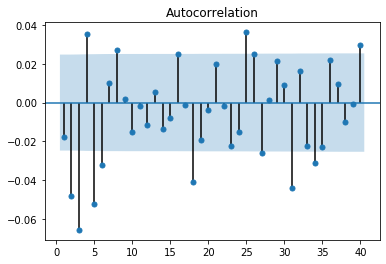

In [43]:
sgt.plot_acf(df.returns, lags = 40, zero = False)
plt.show()

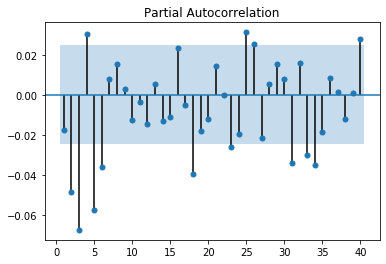

In [44]:
sgt.plot_pacf(df.returns, lags = 40, zero = False)
plt.show()

# AR(1) for Returns

In [45]:
model_ret_ar1 = ARMA(df.returns, order = (1,0))

results = model_ret_ar1.fit()

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(1, 0)   Log Likelihood               -9597.705
Method:                       css-mle   S.D. of innovations              1.117
Date:                Mon, 19 Oct 2020   AIC                          19201.409
Time:                        10:58:58   BIC                          19221.643
Sample:                    01-10-1994   HQIC                         19208.420
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.371      0.170      -0.008       0.046
ar.L1.returns    -0.0176      0.013     -1.394      0.163      -0.042       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -56.8442           +0.0000j           56.8442            0.5000
-----------------------------------------------------------------------------
"""

Here pval are greater than 0.05 hence both the parameters are insignificant

## Higher Lag AR Model for returns

In [47]:
model_ret_ar2 = ARMA(df.returns, order = (2,0))
results2 = model_ret_ar2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(2, 0)   Log Likelihood               -9590.309
Method:                       css-mle   S.D. of innovations              1.115
Date:                Mon, 19 Oct 2020   AIC                          19188.618
Time:                        10:58:58   BIC                          19215.596
Sample:                    01-10-1994   HQIC                         19197.966
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.440      0.150      -0.007       0.045
ar.L1.returns    -0.0184      0.013     -1.463      0.143      -0.043       0.006
ar.L2.returns    -0.0485      0.013     -3.848      0.000      -0.073      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1901           -4.5361j            4.5401           -0.2567
AR.2           -0.1901           +4.5361j            4.5401            0.2567
-----------------------------------------------------------------------------
"""

Here we can see pval or phi2 is zero that means phi2 is significant and hence need to be included in the model.
Also the decreased val of information criterion implies that AR2 is better than AR1.

In [48]:
LLR_test(model_ret_ar1, model_ret_ar2)

0.0

In [49]:
model_ret_ar3 = ARMA(df.returns, order = (3,0))
results3 = model_ret_ar3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(3, 0)   Log Likelihood               -9575.951
Method:                       css-mle   S.D. of innovations              1.113
Date:                Mon, 19 Oct 2020   AIC                          19161.902
Time:                        10:58:59   BIC                          19195.624
Sample:                    01-10-1994   HQIC                         19173.586
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.542      0.123      -0.005       0.043
ar.L1.returns    -0.0217      0.013     -1.725      0.084      -0.046       0.003
ar.L2.returns    -0.0498      0.013     -3.956      0.000      -0.074      -0.025
ar.L3.returns    -0.0676      0.013     -5.365      0.000      -0.092      -0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9712           -2.1405j            2.3505           -0.1822
AR.2            0.9712           +2.1405j            2.3505            0.1822
AR.3           -2.6790           -0.0000j            2.6790           -0.5000
-----------------------------------------------------------------------------
"""

Here we can again see pval for phi2 and phi3 less than 0.05 thus both the terms are significant. 
Also the significant decrease in the information criterion of the model suggests the better model.

In [50]:
LLR_test(model_ret_ar2, model_ret_ar3)

0.0

In [51]:
model_ret_ar4 = ARMA(df.returns, order = (4,0))
results4 = model_ret_ar4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(4, 0)   Log Likelihood               -9573.016
Method:                       css-mle   S.D. of innovations              1.112
Date:                Mon, 19 Oct 2020   AIC                          19158.032
Time:                        10:58:59   BIC                          19198.499
Sample:                    01-10-1994   HQIC                         19172.053
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.494      0.135      -0.006       0.044
ar.L1.returns    -0.0197      0.013     -1.558      0.119      -0.044       0.005
ar.L2.returns    -0.0482      0.013     -3.832      0.000      -0.073      -0.024
ar.L3.returns    -0.0669      0.013     -5.313      0.000      -0.092      -0.042
ar.L4.returns     0.0306      0.013      2.423      0.015       0.006       0.055
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0764           -0.0000j            2.0764           -0.5000
AR.2            0.3947           -2.0922j            2.1291           -0.2203
AR.3            0.3947           +2.0922j            2.1291            0.2203
AR.4            3.4747           -0.0000j            3.4747           -0.0000
-----------------------------------------------------------------------------
"""

In [52]:
LLR_test(model_ret_ar3, model_ret_ar4)

0.015

In [53]:
model_ret_ar5 = ARMA(df.returns, order = (5,0))
results5 = model_ret_ar5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(5, 0)   Log Likelihood               -9562.542
Method:                       css-mle   S.D. of innovations              1.110
Date:                Mon, 19 Oct 2020   AIC                          19139.083
Time:                        10:59:00   BIC                          19186.295
Sample:                    01-10-1994   HQIC                         19155.441
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.584      0.113      -0.005       0.043
ar.L1.returns    -0.0179      0.013     -1.420      0.156      -0.043       0.007
ar.L2.returns    -0.0521      0.013     -4.136      0.000      -0.077      -0.027
ar.L3.returns    -0.0697      0.013     -5.536      0.000      -0.094      -0.045
ar.L4.returns     0.0294      0.013      2.336      0.019       0.005       0.054
ar.L5.returns    -0.0577      0.013     -4.581      0.000      -0.082      -0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6076           -0.0000j            1.6076           -0.5000
AR.2           -0.3482           -1.7427j            1.7771           -0.2814
AR.3           -0.3482           +1.7427j            1.7771            0.2814
AR.4            1.4069           -1.1970j            1.8472           -0.1122
AR.5            1.4069           +1.1970j            1.8472            0.1122
-----------------------------------------------------------------------------
"""

In [54]:
LLR_test(model_ret_ar4, model_ret_ar5)

0.0

In [55]:
model_ret_ar6 = ARMA(df.returns, order = (6,0))
results6 = model_ret_ar6.fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(6, 0)   Log Likelihood               -9558.464
Method:                       css-mle   S.D. of innovations              1.110
Date:                Mon, 19 Oct 2020   AIC                          19132.928
Time:                        10:59:01   BIC                          19186.884
Sample:                    01-10-1994   HQIC                         19151.623
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.643      0.100      -0.004       0.042
ar.L1.returns    -0.0200      0.013     -1.583      0.113      -0.045       0.005
ar.L2.returns    -0.0510      0.013     -4.053      0.000      -0.076      -0.026
ar.L3.returns    -0.0722      0.013     -5.725      0.000      -0.097      -0.047
ar.L4.returns     0.0276      0.013      2.186      0.029       0.003       0.052
ar.L5.returns    -0.0584      0.013     -4.635      0.000      -0.083      -0.034
ar.L6.returns    -0.0360      0.013     -2.857      0.004      -0.061      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3034           -0.9330j            1.6029           -0.0989
AR.2            1.3034           +0.9330j            1.6029            0.0989
AR.3           -0.1126           -1.5943j            1.5983           -0.2612
AR.4           -0.1126           +1.5943j            1.5983            0.2612
AR.5           -2.0008           -0.4747j            2.0564           -0.4629
AR.6           -2.0008           +0.4747j            2.0564            0.4629
-----------------------------------------------------------------------------
"""

In [56]:
LLR_test(model_ret_ar5, model_ret_ar6)

0.004

In [57]:
model_ret_ar7 = ARMA(df.returns, order = (7,0))
results7 = model_ret_ar7.fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(7, 0)   Log Likelihood               -9558.281
Method:                       css-mle   S.D. of innovations              1.110
Date:                Mon, 19 Oct 2020   AIC                          19134.561
Time:                        10:59:02   BIC                          19195.261
Sample:                    01-10-1994   HQIC                         19155.593
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.631      0.103      -0.004       0.042
ar.L1.returns    -0.0197      0.013     -1.561      0.119      -0.044       0.005
ar.L2.returns    -0.0506      0.013     -4.011      0.000      -0.075      -0.026
ar.L3.returns    -0.0724      0.013     -5.740      0.000      -0.097      -0.048
ar.L4.returns     0.0281      0.013      2.224      0.026       0.003       0.053
ar.L5.returns    -0.0580      0.013     -4.598      0.000      -0.083      -0.033
ar.L6.returns    -0.0359      0.013     -2.844      0.004      -0.061      -0.011
ar.L7.returns     0.0076      0.013      0.606      0.544      -0.017       0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7554           -0.5583j            1.8421           -0.4510
AR.2           -1.7554           +0.5583j            1.8421            0.4510
AR.3           -0.1529           -1.5557j            1.5632           -0.2656
AR.4           -0.1529           +1.5557j            1.5632            0.2656
AR.5            1.2934           -0.9953j            1.6320           -0.1044
AR.6            1.2934           +0.9953j            1.6320            0.1044
AR.7            5.9207           -0.0000j            5.9207           -0.0000
-----------------------------------------------------------------------------
"""

In [58]:
LLR_test(model_ret_ar6, model_ret_ar7)

0.545

#### Here we can see significant decrease in information criterion value and  value for LLR test is also significantly large thus we prefer 'AR(7)' model over rest of the models.

## Normalizing Values

In [59]:
benchmark = df.spx.iloc[0]

In [60]:
df['norm'] = df.spx.div(benchmark).mul(100)

In [61]:
sts.adfuller(df.norm)

(1.1143250516465246,
 0.9953370456865456,
 10,
 6265,
 {'1%': -3.4313942109103537,
  '5%': -2.8620014488169447,
  '10%': -2.5670156262352637},
 30795.300188384466)

Here we can see val of tstat is greater than ttab thus non-stationary TS assumption holds and hence we cant use normalizing approach for AR models

In [62]:
ben_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(benchmark).mul(100)
sts.adfuller(df.norm_ret)

(-15.14076133203497,
 7.016338451090485e-28,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 -429.3496692506724)

Here we can say the data is stationary as tcal = -15.14 is less than ttab = -2.862.
Also we can say normalizing does not affect stationarity.

## Normalizing Returns

In [63]:
model_norm_ret_ar1 = ARMA(df.norm_ret, order = (1,0))
results7 = model_norm_ret_ar1.fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                     ARMA(1, 0)   Log Likelihood                 184.777
Method:                       css-mle   S.D. of innovations              0.235
Date:                Mon, 19 Oct 2020   AIC                           -363.555
Time:                        10:59:04   BIC                           -343.321
Sample:                    01-10-1994   HQIC                          -356.544
                         - 01-29-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0040      0.003      1.371      0.170      -0.002       0.010
ar.L1.norm_ret    -0.0176      0.013     -1.394      0.163      -0.042       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -56.8439           +0.0000j           56.8439            0.5000
-----------------------------------------------------------------------------
"""

In [64]:
model_norm_ret_ar2 = ARMA(df.norm_ret, order = (2,0))
results2 = model_norm_ret_ar2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                     ARMA(2, 0)   Log Likelihood                 192.173
Method:                       css-mle   S.D. of innovations              0.235
Date:                Mon, 19 Oct 2020   AIC                           -376.346
Time:                        10:59:04   BIC                           -349.368
Sample:                    01-10-1994   HQIC                          -366.998
                         - 01-29-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0040      0.003      1.440      0.150      -0.001       0.009
ar.L1.norm_ret    -0.0184      0.013     -1.463      0.143      -0.043       0.006
ar.L2.norm_ret    -0.0485      0.013     -3.848      0.000      -0.073      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1901           -4.5361j            4.5401           -0.2567
AR.2           -0.1901           +4.5361j            4.5401            0.2567
-----------------------------------------------------------------------------
"""

Here we can see trends simalr to non-normalised returns thus we can say normalising doesnt affect model selection.

In [65]:
model_norm_ret_ar7 = ARMA(df.norm_ret, order = (7,0))
results7 = model_norm_ret_ar7.fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                     ARMA(7, 0)   Log Likelihood                 224.202
Method:                       css-mle   S.D. of innovations              0.233
Date:                Mon, 19 Oct 2020   AIC                           -430.403
Time:                        10:59:04   BIC                           -369.703
Sample:                    01-10-1994   HQIC                          -409.371
                         - 01-29-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0040      0.002      1.631      0.103      -0.001       0.009
ar.L1.norm_ret    -0.0197      0.013     -1.561      0.119      -0.044       0.005
ar.L2.norm_ret    -0.0506      0.013     -4.011      0.000      -0.075      -0.026
ar.L3.norm_ret    -0.0724      0.013     -5.740      0.000      -0.097      -0.048
ar.L4.norm_ret     0.0281      0.013      2.224      0.026       0.003       0.053
ar.L5.norm_ret    -0.0580      0.013     -4.598      0.000      -0.083      -0.033
ar.L6.norm_ret    -0.0359      0.013     -2.844      0.004      -0.061      -0.011
ar.L7.norm_ret     0.0076      0.013      0.606      0.544      -0.017       0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7554           -0.5583j            1.8421           -0.4510
AR.2           -1.7554           +0.5583j            1.8421            0.4510
AR.3           -0.1529           -1.5557j            1.5632           -0.2656
AR.4           -0.1529           +1.5557j            1.5632            0.2656
AR.5            1.2934           -0.9953j            1.6320           -0.1044
AR.6            1.2934           +0.9953j            1.6320            0.1044
AR.7            5.9207           -0.0000j            5.9207           -0.0000
-----------------------------------------------------------------------------
"""

## Analysing the residuals of Returns

In [66]:
df['res_price'] = model_ret_ar7.fit().resid[1:]

In [67]:
df.res_price.mean()

-1.2183791291530611e-05

In [68]:
df.res_price.var()

1.2317213345088793

In [69]:
sts.adfuller(df.res_price[2:])

(-15.016888558799774,
 1.0358774648200918e-27,
 34,
 6239,
 {'1%': -3.43139856427888,
  '5%': -2.8620033722813014,
  '10%': -2.567016650141434},
 19019.78091770876)

The residuals are stationary.

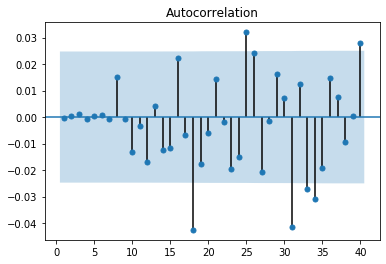

In [70]:
#
sgt.plot_acf(df.res_price[2:], lags = 40, zero = False)
plt.show()

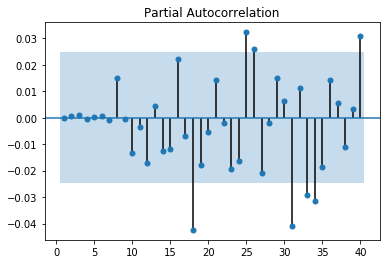

In [71]:
# 
sgt.plot_pacf(df.res_price[2:], lags = 40, zero = False)
plt.show()

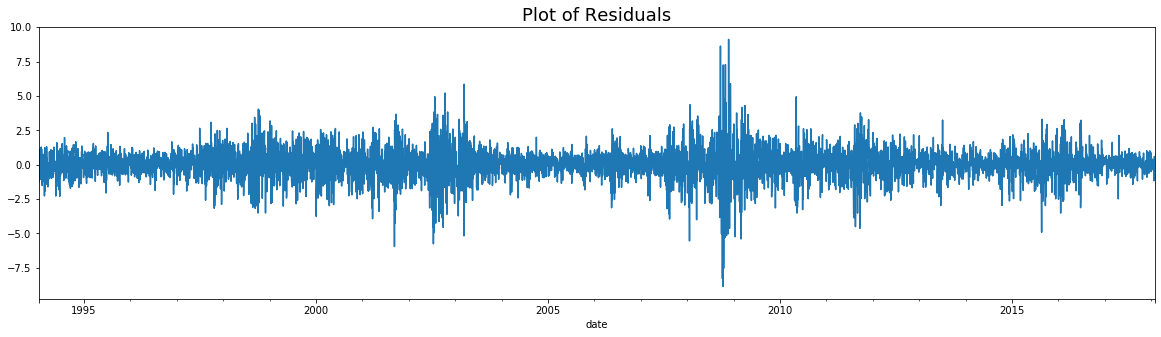

In [72]:
#Residuals 
df.res_price.plot(figsize = (20,5))
plt.title("Plot of Residuals", size = 18);